In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
import statistics
from statistics import mean
import time
import datetime

In [7]:
df=pd.read_csv("C:/Users/gokul/Downloads/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,40911.0,14.621429,14.732143,14.607143,14.686786,12.610315,302220800.0
1,40912.0,14.642857,14.810000,14.617143,14.765714,12.678085,260022000.0
2,40913.0,14.819643,14.948214,14.738214,14.929643,12.818838,271269600.0
3,40914.0,14.991786,15.098214,14.972143,15.085714,12.952841,318292800.0
4,40917.0,15.196429,15.276786,15.048214,15.061786,12.932299,394024400.0


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.shape

(2470, 7)

In [10]:
#plt.plot(df.Open,df.Close, type='candle')

In [11]:
X=df
Y=pd.DataFrame()
for i in range(2451,2470):
    X.drop(i, inplace = True)
X

,Date,Open,High,Low,Close,Adj Close,Volume
0,40911.0,14.621429,14.732143,14.607143,14.686786,12.610315,302220800.0
1,40912.0,14.642857,14.810000,14.617143,14.765714,12.678085,260022000.0
2,40913.0,14.819643,14.948214,14.738214,14.929643,12.818838,271269600.0
3,40914.0,14.991786,15.098214,14.972143,15.085714,12.952841,318292800.0
4,40917.0,15.196429,15.276786,15.048214,15.061786,12.932299,394024400.0
...,...,...,...,...,...,...,...
2446,44461.0,144.449997,146.429993,143.699997,145.850006,145.850006,76404300.0
2447,44462.0,146.649994,147.080002,145.639999,146.830002,146.830002,64838200.0
2448,44463.0,145.660004,147.470001,145.559998,146.919998,146.919998,53434200.0
2449,44466.0,145.470001,145.960007,143.820007,145.369995,145.369995,74150700.0


In [12]:
#del Y
Y['Date'] = X.iloc[:,0]
Y['Open'] = X.iloc[:,2]
Y['Close'] = X.iloc[:,3]
Y.tail(30)

,Date,Open,Close
2421,44425.0,151.679993,149.089996
2422,44426.0,150.720001,146.149994
2423,44427.0,148.000000,144.500000
2424,44428.0,148.500000,146.779999
2425,44431.0,150.190002,147.889999
2426,44432.0,150.860001,149.149994
2427,44433.0,150.320007,147.800003
2428,44434.0,149.119995,147.509995
2429,44435.0,148.750000,146.830002
2430,44438.0,153.490005,148.610001


In [13]:
 Y=Y.tail(60)

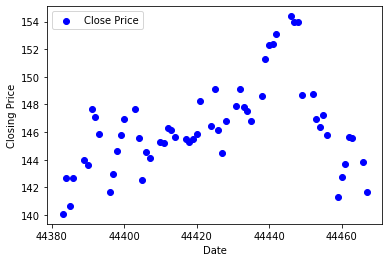

In [14]:
plt.scatter(Y.Date,Y.Close,color='blue',label='Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

In [15]:
m = (((mean(Y.Date)*mean(Y.Close)) - mean(Y.Date*Y.Close)) /
         ((mean(Y.Date)*mean(Y.Date)) - mean(Y.Date*Y.Date)))
    
b = mean(Y.Close) - m*mean(Y.Date)

In [16]:
print(m)
print(b)

0.04751719518208037
-1964.580550720787


In [17]:
regression_line = []
for x in Y.Date:
    regression_line.append((m*x)+b)

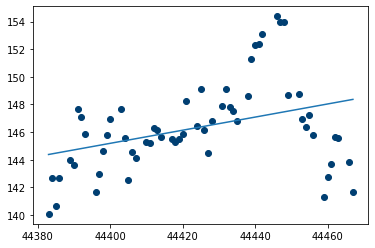

In [18]:
plt.scatter(Y.Date,Y.Close,color='#003F72')
plt.plot(Y.Date, regression_line)
plt.show()

In [19]:
z=Y.tail(1)
x=m*z.Close-b
print(x)

2450    1971.313262
Name: Close, dtype: float64
